

# **Exploratory Data Analysis and Machine Learning Model Evaluation: Understanding Student Flexibility in Online Learning**



**Importing the necessary libraries and data for EDA**

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


**Loading the data**

In [ ]:
df = pd.read_csv('students_adaptability_level_online_education.csv')
df

,Education Level,Institution Type,Gender,Age,Device,IT Student,Location,Financial Condition,Internet Type,Network Type,Flexibility Level
0,University,Private,Male,23,Tab,No,Town,Mid,Wifi,4G,Moderate
1,University,Private,Female,23,Mobile,No,Town,Mid,Mobile Data,4G,Moderate
2,College,Public,Female,18,Mobile,No,Town,Mid,Wifi,4G,Moderate
3,School,Private,Female,11,Mobile,No,Town,Mid,Mobile Data,4G,Moderate
4,School,Private,Female,18,Mobile,No,Town,Poor,Mobile Data,3G,Low
...,...,...,...,...,...,...,...,...,...,...,...
1200,College,Private,Female,18,Mobile,No,Town,Mid,Wifi,4G,Low
1201,College,Private,Female,18,Mobile,No,Rural,Mid,Wifi,4G,Moderate
1202,School,Private,Male,11,Mobile,No,Town,Mid,Mobile Data,3G,Moderate
1203,College,Private,Female,18,Mobile,No,Rural,Mid,Wifi,4G,Low


**Need to look at the data type**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Education Level      1205 non-null   object
 1   Institution Type     1205 non-null   object
 2   Gender               1205 non-null   object
 3   Age                  1205 non-null   object
 4   Device               1205 non-null   object
 5   IT Student           1205 non-null   object
 6   Location             1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Flexibility Level    1205 non-null   object
dtypes: object(11)
memory usage: 103.7+ KB


In [ ]:
df.Age = df.Age.astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Education Level      1205 non-null   object
 1   Institution Type     1205 non-null   object
 2   Gender               1205 non-null   object
 3   Age                  1205 non-null   object
 4   Device               1205 non-null   object
 5   IT Student           1205 non-null   object
 6   Location             1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Flexibility Level    1205 non-null   object
dtypes: object(11)
memory usage: 103.7+ KB


In [ ]:
df.isnull().sum()

Education Level        0
Institution Type       0
Gender                 0
Age                    0
Device                 0
IT Student             0
Location               0
Financial Condition    0
Internet Type          0
Network Type           0
Flexibility Level      0
dtype: int64

In [ ]:
df.describe()

,Education Level,Institution Type,Gender,Age,Device,IT Student,Location,Financial Condition,Internet Type,Network Type,Flexibility Level
count,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205
unique,3,2,2,6,3,2,2,3,2,3,3
top,School,Private,Male,23,Mobile,No,Town,Mid,Mobile Data,4G,Moderate
freq,530,823,663,374,1013,901,935,878,695,775,625


**Model Implementation**

In [ ]:

print(df.columns)


Index(['Education Level', 'Institution Type', 'Gender', 'Age', 'Device',
       'IT Student', 'Location', 'Financial Condition', 'Internet Type',
       'Network Type', 'Flexibility Level'],
      dtype='object')


In [ ]:
scaler = OrdinalEncoder()
names = df.columns
d = scaler.fit_transform(df)

scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head()

,Education Level,Institution Type,Gender,Age,Device,IT Student,Location,Financial Condition,Internet Type,Network Type,Flexibility Level
0,2.0,0.0,1.0,3.0,2.0,0.0,1.0,0.0,1.0,2.0,2.0
1,2.0,0.0,0.0,3.0,1.0,0.0,1.0,0.0,0.0,2.0,2.0
2,0.0,1.0,0.0,2.0,1.0,0.0,1.0,0.0,1.0,2.0,2.0
3,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,2.0
4,1.0,0.0,0.0,2.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0


In [ ]:
oversample = SMOTE()
features, labels=  oversample.fit_resample(scaled_df.drop(["Flexibility Level"],axis=1),scaled_df["Flexibility Level"])

**Model Evaluation**

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(features, labels,test_size=0.33,random_state=42)

In [ ]:
models = {
    "Random Forest Classifier": RandomForestClassifier(),
    "K-Nearest Neighbors Classifier": KNeighborsClassifier(),
    "Support Vector Classifier (SVC)": SVC(),
    "Logistic Regression": LogisticRegression()
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    report = classification_report(y_test, y_pred, zero_division=1, output_dict=True)

    print(f"**{model_name}:**")
    print("-" * 30)
    print(f"- **Accuracy:** {report['accuracy']:.0%}")
    for class_label, metrics in report.items():
        if class_label.isdigit():
            print(f"- **Class {int(class_label)}:**")
            print(f"  - **Precision:** {metrics['precision']:.0%}")
            print(f"  - **Recall:** {metrics['recall']:.0%}")
            print(f"  - **F1-score:** {metrics['f1-score']:.0%}")
    print("-" * 30)
    print()


**Random Forest Classifier:**
------------------------------
- **Accuracy:** 83%
------------------------------

**K-Nearest Neighbors Classifier:**
------------------------------
- **Accuracy:** 78%
------------------------------

**Support Vector Classifier (SVC):**
------------------------------
- **Accuracy:** 71%
------------------------------

**Logistic Regression:**
------------------------------
- **Accuracy:** 62%
------------------------------



In [ ]:
models = [RandomForestClassifier(), KNeighborsClassifier(), SVC(), LogisticRegression()]
scores = dict()

for m in models:
    m.fit(X_train, y_train)
    y_pred = m.predict(X_test)

    print(f'model: {str(m)}')
    print(classification_report(y_test,y_pred, zero_division=1))
    print('-'*30, '\n')

model: RandomForestClassifier()
              precision    recall  f1-score   support

         0.0       0.90      0.96      0.93       214
         1.0       0.86      0.82      0.84       207
         2.0       0.81      0.79      0.80       198

    accuracy                           0.86       619
   macro avg       0.86      0.86      0.86       619
weighted avg       0.86      0.86      0.86       619

------------------------------ 

model: KNeighborsClassifier()
              precision    recall  f1-score   support

         0.0       0.86      0.96      0.91       214
         1.0       0.71      0.79      0.75       207
         2.0       0.76      0.59      0.66       198

    accuracy                           0.78       619
   macro avg       0.78      0.78      0.77       619
weighted avg       0.78      0.78      0.78       619

------------------------------ 

model: SVC()
              precision    recall  f1-score   support

         0.0       0.80      0.71      0.7

**Model Selection**

In [ ]:
model=RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred, zero_division=1))

              precision    recall  f1-score   support

         0.0       0.90      0.96      0.93       214
         1.0       0.85      0.79      0.82       207
         2.0       0.78      0.78      0.78       198

    accuracy                           0.85       619
   macro avg       0.84      0.84      0.84       619
weighted avg       0.85      0.85      0.85       619



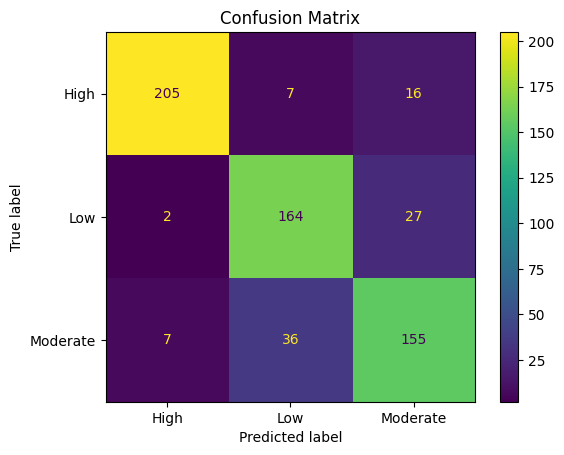

In [ ]:
cm = confusion_matrix(model.predict(X_test),y_test)
disp = ConfusionMatrixDisplay(cm, display_labels=["High","Low","Moderate"])
disp.plot()
plt.title("Confusion Matrix")
plt.show()

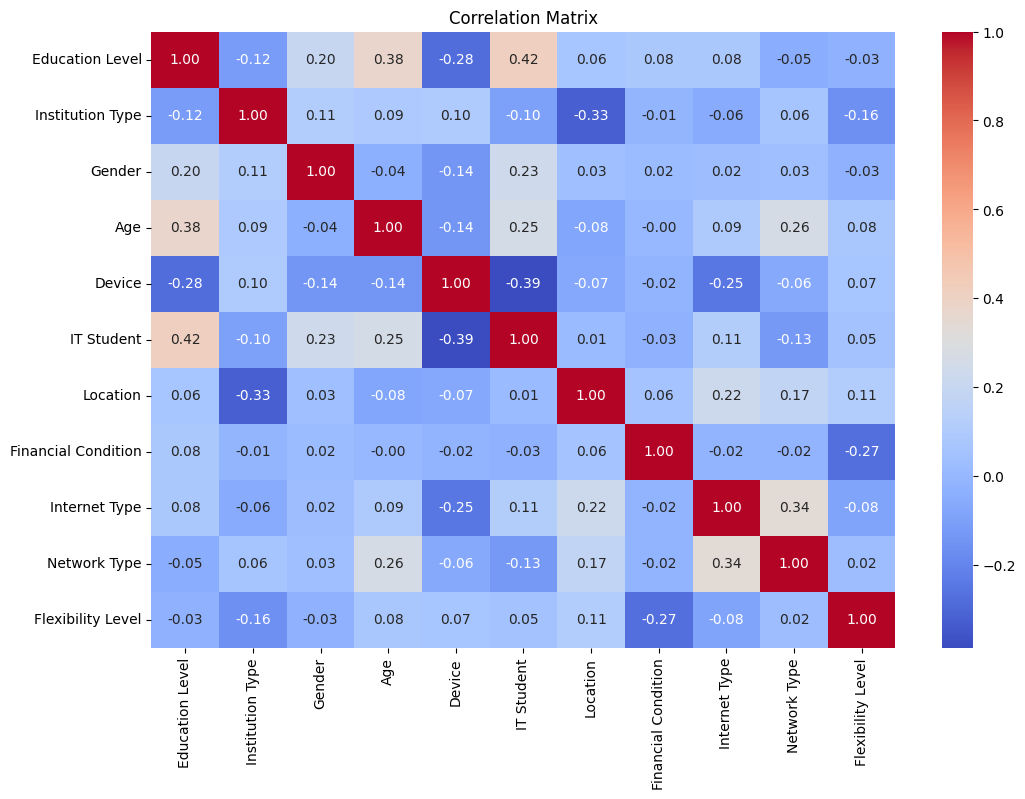

In [ ]:
correlation_matrix = scaled_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()